# Imports & globals

In [1]:
import sys
sys.path.append("/home/cbarkhof/fall-2021")

In [2]:
from analysis_run_postprocessing.general_postprocessing_steps import *

%config InlineBackend.figure_format='retina'
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

DEVICE = "cuda:0"
EXPORT_DIR = f"{CODE_DIR}/analysis_run_postprocessing/run_postprocess_files"
EVALUATION_RESULT_FILE = "evaluation-results.pt"

# Fetch relevant runs

In [3]:
prefixes = ["(mdr-vae-exp 8 oct)", "(fb-vae-exp 8 oct) ", 
            "(beta-vae-exp 6 oct) ", "(inf-vae-exp 5 oct) ", 
            "(5-jan ptb-test)", "(4-jan ptb-test)", "(10-jan ptb)", "(11-jan ptb)"]

run_df = make_run_overview_df(prefixes)
run_df

,objective,l_rate,dataset,image_or_language,beta_beta,free_bits,mdr_value,l_mmd,decoder,run_name
INFO-VAE l_Rate 2 l_MMD 1000 dec: Weak-M roBERTa,INFO-VAE,2,ptb,language,0,0,0,1000,weak_memory_distil_roberta_decoder,"(11-jan ptb) INFO-VAE[l_1_rate=2.0, l_2_mmd=10..."
INFO-VAE l_Rate 2 l_MMD 100 dec: Weak-M roBERTa,INFO-VAE,2,ptb,language,0,0,0,100,weak_memory_distil_roberta_decoder,"(11-jan ptb) INFO-VAE[l_1_rate=2.0, l_2_mmd=10..."
INFO-VAE l_Rate 2 l_MMD 10 dec: Weak-M roBERTa,INFO-VAE,2,ptb,language,0,0,0,10,weak_memory_distil_roberta_decoder,"(11-jan ptb) INFO-VAE[l_1_rate=2.0, l_2_mmd=10..."
INFO-VAE l_Rate 2 l_MMD 1 dec: Weak-M roBERTa,INFO-VAE,2,ptb,language,0,0,0,1,weak_memory_distil_roberta_decoder,"(11-jan ptb) INFO-VAE[l_1_rate=2.0, l_2_mmd=1...."
INFO-VAE l_Rate 1 l_MMD 100 dec: Weak-M roBERTa,INFO-VAE,1,ptb,language,0,0,0,100,weak_memory_distil_roberta_decoder,"(11-jan ptb) INFO-VAE[l_1_rate=1.0, l_2_mmd=10..."
...,...,...,...,...,...,...,...,...,...,...
INFO-VAE l_Rate 100 l_MMD 100 dec: CNN.T,INFO-VAE,100,bmnist,image,0,0,0,100,basic_deconv_decoder,"(inf-vae-exp 5 oct) INFO-VAE[l_1_rate=100.0, l..."
INFO-VAE l_Rate 1000 l_MMD 1 dec: CNN.T,INFO-VAE,1000,bmnist,image,0,0,0,1,basic_deconv_decoder,"(inf-vae-exp 5 oct) INFO-VAE[l_1_rate=1000.0, ..."
INFO-VAE l_Rate 100 l_MMD 1000 dec: PixelCNN++,INFO-VAE,100,bmnist,image,0,0,0,1000,cond_pixel_cnn_pp,"(inf-vae-exp 5 oct) INFO-VAE[l_1_rate=100.0, l..."
INFO-VAE l_Rate 1 l_MMD 1000 dec: CNN.T,INFO-VAE,1,bmnist,image,0,0,0,1000,basic_deconv_decoder,"(inf-vae-exp 5 oct) INFO-VAE[l_1_rate=1.0, l_2..."


# Check whether there are evaluation results missing

In [4]:
missing_df = overview_of_missing_analysis(run_df)
missing_df.sum()

dir               0
surprisal_data    0
encode            0
samples           0
cond_samples      0
evaluation        0
dtype: int64

In [5]:
missing_df = run_df.join(missing_df, on="run_name")
missing_df

,objective,l_rate,dataset,image_or_language,beta_beta,free_bits,mdr_value,l_mmd,decoder,run_name,dir,surprisal_data,encode,samples,cond_samples,evaluation
INFO-VAE l_Rate 2 l_MMD 1000 dec: Weak-M roBERTa,INFO-VAE,2,ptb,language,0,0,0,1000,weak_memory_distil_roberta_decoder,"(11-jan ptb) INFO-VAE[l_1_rate=2.0, l_2_mmd=10...",False,False,False,False,False,False
INFO-VAE l_Rate 2 l_MMD 100 dec: Weak-M roBERTa,INFO-VAE,2,ptb,language,0,0,0,100,weak_memory_distil_roberta_decoder,"(11-jan ptb) INFO-VAE[l_1_rate=2.0, l_2_mmd=10...",False,False,False,False,False,False
INFO-VAE l_Rate 2 l_MMD 10 dec: Weak-M roBERTa,INFO-VAE,2,ptb,language,0,0,0,10,weak_memory_distil_roberta_decoder,"(11-jan ptb) INFO-VAE[l_1_rate=2.0, l_2_mmd=10...",False,False,False,False,False,False
INFO-VAE l_Rate 2 l_MMD 1 dec: Weak-M roBERTa,INFO-VAE,2,ptb,language,0,0,0,1,weak_memory_distil_roberta_decoder,"(11-jan ptb) INFO-VAE[l_1_rate=2.0, l_2_mmd=1....",False,False,False,False,False,False
INFO-VAE l_Rate 1 l_MMD 100 dec: Weak-M roBERTa,INFO-VAE,1,ptb,language,0,0,0,100,weak_memory_distil_roberta_decoder,"(11-jan ptb) INFO-VAE[l_1_rate=1.0, l_2_mmd=10...",False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
INFO-VAE l_Rate 100 l_MMD 100 dec: CNN.T,INFO-VAE,100,bmnist,image,0,0,0,100,basic_deconv_decoder,"(inf-vae-exp 5 oct) INFO-VAE[l_1_rate=100.0, l...",False,False,False,False,False,False
INFO-VAE l_Rate 1000 l_MMD 1 dec: CNN.T,INFO-VAE,1000,bmnist,image,0,0,0,1,basic_deconv_decoder,"(inf-vae-exp 5 oct) INFO-VAE[l_1_rate=1000.0, ...",False,False,False,False,False,False
INFO-VAE l_Rate 100 l_MMD 1000 dec: PixelCNN++,INFO-VAE,100,bmnist,image,0,0,0,1000,cond_pixel_cnn_pp,"(inf-vae-exp 5 oct) INFO-VAE[l_1_rate=100.0, l...",False,False,False,False,False,False
INFO-VAE l_Rate 1 l_MMD 1000 dec: CNN.T,INFO-VAE,1,bmnist,image,0,0,0,1000,basic_deconv_decoder,"(inf-vae-exp 5 oct) INFO-VAE[l_1_rate=1.0, l_2...",False,False,False,False,False,False


# Gather all the evaluation results

In [6]:
all_results = dict()

for idx, row in missing_df[missing_df.evaluation == False].iterrows():
    
    save_dir = f"{EXPORT_DIR}/{row.run_name}"
    result_file = f"{save_dir}/{EVALUATION_RESULT_FILE}"
    
    if os.path.exists(result_file):
        res = torch.load(result_file)
        
        for phase, phase_res in res.items():
            
            all_results[(idx, phase)] = dict()
            
            for k in sorted(list(phase_res.keys())):
                if " mean" in k:
                    var_name = k.split(" mean")[0]
                    
                    all_results[(idx, phase)][var_name] = phase_res[k]
            
            #all_results[(idx, phase)]["run_name"] = row.run_name
                    
results_df = pd.DataFrame(all_results).transpose()
results_df = results_df.reset_index(level=1).rename({"level_1":"phase"}, axis=1)
results_df.head()

I0112 19:42:36.075045 22773093060352 utils.py:145] Note: NumExpr detected 12 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
I0112 19:42:36.076590 22773093060352 utils.py:157] NumExpr defaulting to 8 threads.


,phase,IW LL,MMD,PPL,distortion,elbo,kl_prior_post,mean_mean,mean_scale,std_across_x_mean,std_across_x_scale,std_across_z_mean,std_across_z_scale
INFO-VAE l_Rate 2 l_MMD 1000 dec: Weak-M roBERTa,test,-161.643823,1.072884e-05,0.002708,158.235834,-159.272598,1.036764,0.002389,0.978434,0.035406,0.008622,0.122288,0.114185
INFO-VAE l_Rate 2 l_MMD 1000 dec: Weak-M roBERTa,valid,-157.229849,1.192093e-07,0.002457,158.061217,-159.172941,1.111723,0.000278,0.978075,0.037297,0.008619,0.129858,0.115263
INFO-VAE l_Rate 2 l_MMD 1000 dec: Weak-M roBERTa,train,-167.893767,8.463860e-06,0.002510,158.795354,-159.937081,1.141727,0.001486,0.978088,0.038018,0.008621,0.131714,0.116584
INFO-VAE l_Rate 2 l_MMD 100 dec: Weak-M roBERTa,test,-159.994855,1.966953e-05,0.002938,154.807786,-156.674914,1.867128,0.005876,0.962054,0.068804,0.013298,0.199040,0.141342
INFO-VAE l_Rate 2 l_MMD 100 dec: Weak-M roBERTa,valid,-157.814097,2.026558e-06,0.002760,155.953692,-157.933609,1.979917,0.003768,0.961793,0.071776,0.013591,0.209235,0.142822


# Merge with the hyper parameters

In [7]:
results_df['hyper params'] = results_df.index.map(run_df.transpose().to_dict())
results_df = pd.concat([results_df, results_df['hyper params'].apply(pd.Series)], axis=1)
results_df.head()

,phase,IW LL,MMD,PPL,distortion,elbo,kl_prior_post,mean_mean,mean_scale,std_across_x_mean,...,objective,l_rate,dataset,image_or_language,beta_beta,free_bits,mdr_value,l_mmd,decoder,run_name
INFO-VAE l_Rate 2 l_MMD 1000 dec: Weak-M roBERTa,test,-161.643823,1.072884e-05,0.002708,158.235834,-159.272598,1.036764,0.002389,0.978434,0.035406,...,INFO-VAE,2.0,ptb,language,0.0,0,0,1000,weak_memory_distil_roberta_decoder,"(11-jan ptb) INFO-VAE[l_1_rate=2.0, l_2_mmd=10..."
INFO-VAE l_Rate 2 l_MMD 1000 dec: Weak-M roBERTa,valid,-157.229849,1.192093e-07,0.002457,158.061217,-159.172941,1.111723,0.000278,0.978075,0.037297,...,INFO-VAE,2.0,ptb,language,0.0,0,0,1000,weak_memory_distil_roberta_decoder,"(11-jan ptb) INFO-VAE[l_1_rate=2.0, l_2_mmd=10..."
INFO-VAE l_Rate 2 l_MMD 1000 dec: Weak-M roBERTa,train,-167.893767,8.463860e-06,0.002510,158.795354,-159.937081,1.141727,0.001486,0.978088,0.038018,...,INFO-VAE,2.0,ptb,language,0.0,0,0,1000,weak_memory_distil_roberta_decoder,"(11-jan ptb) INFO-VAE[l_1_rate=2.0, l_2_mmd=10..."
INFO-VAE l_Rate 2 l_MMD 100 dec: Weak-M roBERTa,test,-159.994855,1.966953e-05,0.002938,154.807786,-156.674914,1.867128,0.005876,0.962054,0.068804,...,INFO-VAE,2.0,ptb,language,0.0,0,0,100,weak_memory_distil_roberta_decoder,"(11-jan ptb) INFO-VAE[l_1_rate=2.0, l_2_mmd=10..."
INFO-VAE l_Rate 2 l_MMD 100 dec: Weak-M roBERTa,valid,-157.814097,2.026558e-06,0.002760,155.953692,-157.933609,1.979917,0.003768,0.961793,0.071776,...,INFO-VAE,2.0,ptb,language,0.0,0,0,100,weak_memory_distil_roberta_decoder,"(11-jan ptb) INFO-VAE[l_1_rate=2.0, l_2_mmd=10..."


In [8]:
results_df.to_csv("global_stats.csv")

# Columns present to plot

In [9]:
for i, c in enumerate(results_df.columns):
    print(i, c)

0 phase
1 IW LL
2 MMD
3 PPL
4 distortion
5 elbo
6 kl_prior_post
7 mean_mean
8 mean_scale
9 std_across_x_mean
10 std_across_x_scale
11 std_across_z_mean
12 std_across_z_scale
13 hyper params
14 objective
15 l_rate
16 dataset
17 image_or_language
18 beta_beta
19 free_bits
20 mdr_value
21 l_mmd
22 decoder
23 run_name


In [29]:
CODE_DIR = "/home/cbarkhof/fall-2021"

sys.path.append(CODE_DIR)

EXPORT_DIR = f"{CODE_DIR}/analysis_run_postprocessing/run_postprocess_files"
EVALUATION_RESULT_FILE = "evaluation-results.pt"
SURPRISAL_DATA_FILE = "surprisal_data.pt"

for idx, row in results_df.iterrows():
    print(row.run_name)
    
    surprisal = torch.load(f"{EXPORT_DIR}/{row.run_name}/{SURPRISAL_DATA_FILE}")["valid"]
    
    print(np.array(surprisal["iw_lls"]).mean())
    print(np.array(surprisal["lens"]).mean())
    
    perplexity = np.exp(np.array(iw_lls).mean() / np.array(lens).mean())
    
    print(np.array(surprisal["ppl"]).mean())
    
    print(surprisal.keys())
    
    break

(11-jan ptb) INFO-VAE[l_1_rate=2.0, l_2_mmd=1000.0] | WEAK | Nz=32
-157.22984939193725
26.166
0.0024566979016963637
dict_keys(['iw_lls', 'lens', 'ppl'])


In [10]:
stats = ['IW LL', 'MMD', 'PPL', 'distortion', 'elbo', 'kl_prior_post', 'mean_mean', 'mean_scale']

pd.set_option('display.max_rows', 100)
display(results_df[results_df.phase == "valid"].groupby("image_or_language")[stats].describe().transpose())

# for s in stats:
#     for group_name, group_df in results_df.groupby("image_or_language"):
#         print(group_name)
    
#         print(group_name, s)
#         display(group_df[s].describe())
#         group_df.plot(kind="hist", y=s, bins=30)
#         plt.show()
#         print("-"*40)
#         print()

image_or_language         image    language
IW LL         count   76.000000   52.000000
              mean   -99.822145 -131.934488
              std     37.467896   46.972991
              min   -209.208673 -359.346557
              25%    -93.266445 -152.531543
              50%    -88.708665 -145.453873
              75%    -81.111449  -91.402125
              max    -78.864767  -86.616172
MMD           count   76.000000   52.000000
              mean     0.015146    0.000414
              std      0.031264    0.001031
              min     -0.000203   -0.000010
              25%      0.000093    0.000018
              50%      0.001854    0.000104
              75%      0.012129    0.000305
              max      0.147525    0.006174
PPL           count    0.000000   52.000000
              mean          NaN    0.014950
              std           NaN    0.014155
              min           NaN    0.000002
              25%           NaN    0.003098
              50%           NaN    0.003866
              75%           NaN    0.032713
              max           NaN    0.035768
distortion    count   76.000000   52.000000
              mean    88.255228  112.092380
              std     42.659680   30.763855
              min     50.566032   62.263308
              25%     68.970772   89.356154
              50%     75.202940  110.424107
              75%     80.823539  141.588768
              max    206.874049  158.061217
elbo          count   76.000000   52.000000
              mean  -102.350643 -135.075315
              std     37.409766   48.274614
              min   -206.875850 -366.499011
              25%    -97.179356 -155.500678
              50%    -93.010867 -150.671905
              75%    -80.839552  -91.262213
              max    -80.335236  -89.988720
kl_prior_post count   76.000000   52.000000
              mean    14.095415   22.982935
              std     13.854759   45.475430
              min      0.000002    0.000963
              25%      0.000954    1.762868
              50%     12.749264    6.661087
              75%     24.141734   26.699111
              max     46.089022  256.965419
mean_mean     count   76.000000   52.000000
              mean     0.004150   -0.005972
              std      0.037143    0.022069
              min     -0.133279   -0.117522
              25%     -0.003025   -0.010018
              50%     -0.000073   -0.000840
              75%      0.004404    0.002321
              max      0.170109    0.025674
mean_scale    count   76.000000   52.000000
              mean     0.507329    0.748936
              std      0.419149    0.289386
              min      0.013563    0.003356
              25%      0.106354    0.590303
              50%      0.393294    0.890879
              75%      0.998281    0.967704
              max      1.025796    0.998676

# Plots

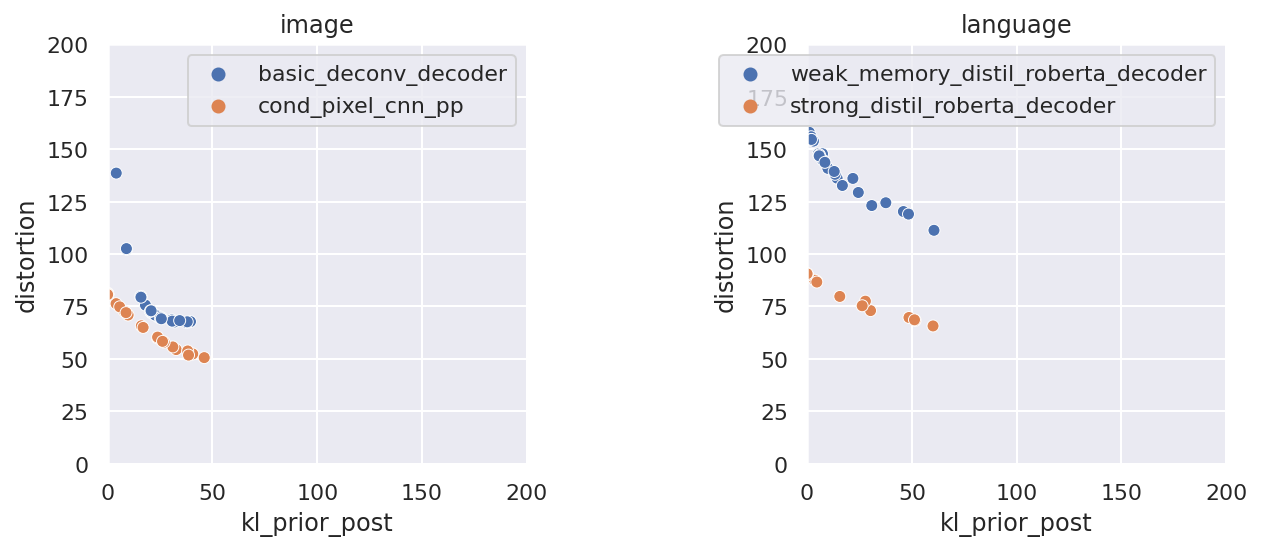

In [10]:
data = results_df[(results_df.phase == "valid") & (results_df.kl_prior_post < 150)]

fig, axs = plt.subplots(ncols=2, figsize=(10, 4))

for i, (group_name, group_df) in enumerate(data.groupby("image_or_language")):
    
    sns.scatterplot(
        x="kl_prior_post", 
        y="distortion", 
        hue="decoder", 
        ax=axs[i],
        data=group_df)
    
    axs[i].legend()
    axs[i].set_xlim([0, 200])
    axs[i].set_ylim([0, 200])
    axs[i].set_aspect("equal")
    
    axs[i].set_title(group_name)

plt.tight_layout()


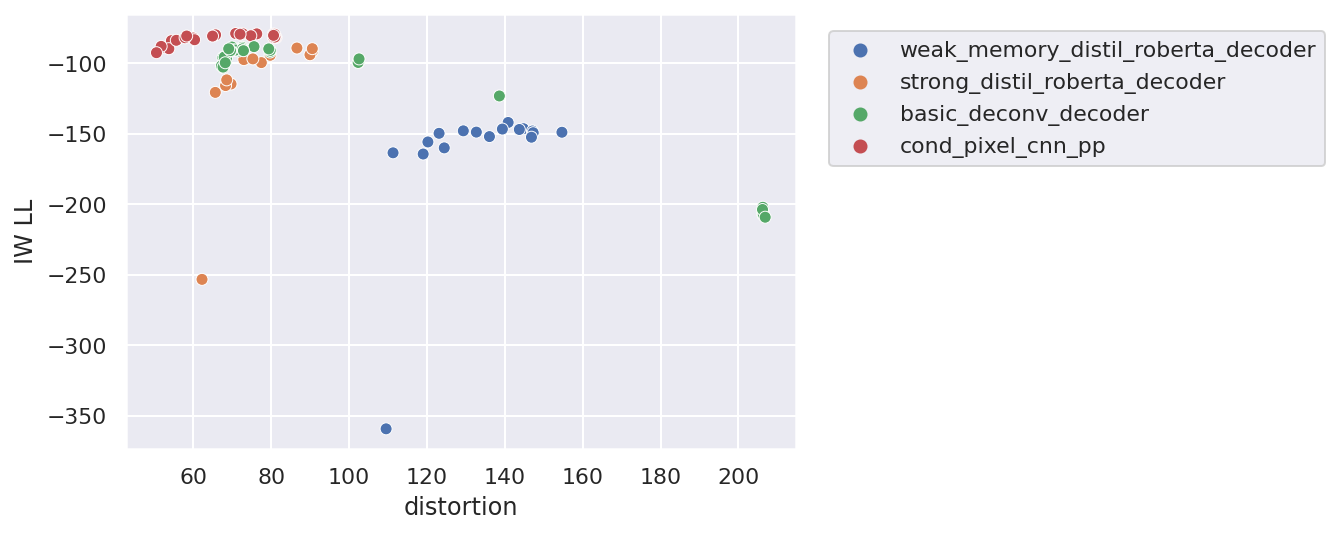

In [10]:
data = results_df[results_df.phase == "valid"]

sns.scatterplot(
    x="distortion", 
    y="IW LL", 
    hue="decoder", 
    data=data) 

plt.legend(loc=(1.05, 0.65))

<AxesSubplot:xlabel='l_mmd', ylabel='MMD'>

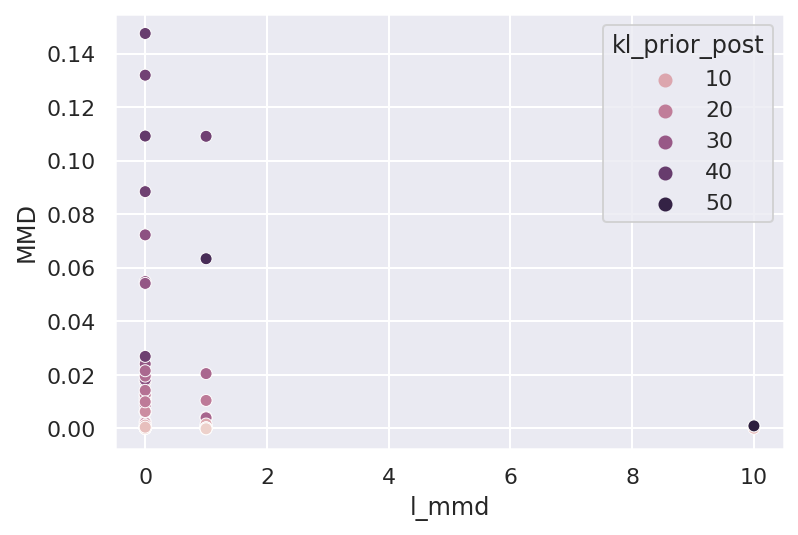

In [16]:
data = results_df[(results_df.phase == "valid") & (results_df.l_mmd < 100)]

sns.scatterplot(
    x="l_mmd", 
    y="MMD", 
    hue="kl_prior_post", 
    data=data) 